In [1]:
import numpy as np
import pandas as pd
import re

# Data Analysis

## Training Data

In [35]:
df = pd.read_csv('./training-v1/offenseval-training-v1.tsv', sep='\t', header=0)

In [36]:
df.head(100)

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN
...,...,...,...,...,...
95,43133,@USER @USER Unfortunately in America a system ...,NOT,NaN,NaN
96,52102,@USER I know! She is still alive....but wonder...,NOT,NaN,NaN
97,59537,@USER @USER Guy you are always present...bet w...,NOT,NaN,NaN
98,44209,@USER @USER what a baby! URL,NOT,NaN,NaN


### No. of  Offensive VS Not Offensive Tweets in Whole Dataset:

In [37]:
df1 = df['subtask_a'].value_counts()
df1

NOT    8840
OFF    4400
Name: subtask_a, dtype: int64

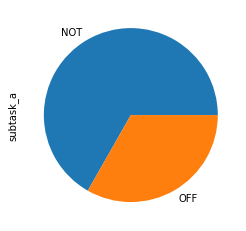

In [38]:
df1.plot.pie()

### No of Targeted VS Untargeted Tweets in Whole Dataset:

In [6]:
df1 = df['subtask_b'].value_counts()
df1

TIN    3876
UNT     524
Name: subtask_b, dtype: int64

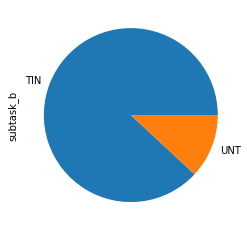

In [7]:
df1.plot.pie()

### No of Individual vs Grouped vs Other Tweets in Whole Dataset:

In [8]:
df1 = df['subtask_c'].value_counts()
df1

IND    2407
GRP    1074
OTH     395
Name: subtask_c, dtype: int64

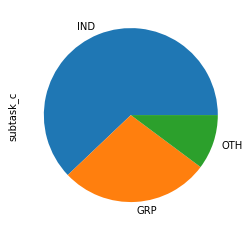

In [9]:
df1.plot.pie()

### If Tweet is Not Offensive Then it will not have any further categories

In [10]:
df1 = df.loc[df.subtask_a == 'NOT', 'subtask_b'].count()
df1

0

### If Tweet is Offensive then it contains the following count of targeted/untargeted offensive tweets

In [11]:
df.loc[df.subtask_a == 'OFF', 'subtask_b'].count()

4400

### If Tweet is Offensive then it contains the following count of Individual/Grouped/Others category offensive tweets (Whose total count should be = Targeted is verified)

In [12]:
df1 = df.loc[df.subtask_a == 'OFF', 'subtask_c'].count()

In [13]:
subtaskb_df = df.loc[df.subtask_a == 'OFF', ('subtask_b','subtask_c')]

In [14]:
subtaskb_df

,subtask_b,subtask_c
0,UNT,NaN
1,TIN,IND
3,UNT,NaN
5,TIN,OTH
6,UNT,NaN
...,...,...
13223,TIN,GRP
13227,TIN,GRP
13235,TIN,IND
13237,TIN,OTH


### If Tweet is Offensive and targeted no. of subtask_c type tweets:

In [15]:
subtaskb_df.loc[subtaskb_df.subtask_b=='TIN','subtask_c'].value_counts()

IND    2407
GRP    1074
OTH     395
Name: subtask_c, dtype: int64

In [16]:
# subtaskb_df.loc[subtaskb_df.subtask_b=='UNT','subtask_c'].value_counts()

### If Tweet is Offensive and untargeted then no. of subtask_c type tweets:

In [17]:
#Since it is Nan hence we do fillna() it
subtaskb_df["subtask_c"].fillna("None", inplace = True) 
subtaskb_df.loc[subtaskb_df.subtask_b=='UNT','subtask_c'].value_counts()

None    524
Name: subtask_c, dtype: int64

### Average Length of Tweets in the Whole Dataset

In [18]:
totalWords = 0
maxWordCount = 0
minWordCount = 22
for tw in df['tweet']:
    #Strip Spaces
    tw = tw.strip()
    #Strip Special Characters
    t = re.sub(r'[^a-zA-Z0-9 ]',r'',tw)
#     print(t)
    wordCount = 0
    for char in t:
        if char == ' ':
            wordCount += 1
#     print(wordCount)
    if wordCount > maxWordCount:
        maxWordCount = wordCount
    if wordCount < minWordCount:
        minWordCount = wordCount
    totalWords += wordCount

avgLen = totalWords/len(df['tweet'])
print('Average Tweet Length: ' + str(avgLen))
print('Maximum Tweet Length: ' + str(maxWordCount))
print('Minimum Tweet Length: ' + str(minWordCount))
#     wordCount = len(split(t))
#     print(wordCount)
#     print(len(t))


Average Tweet Length: 21.721752265861028
Maximum Tweet Length: 102
Minimum Tweet Length: 1


In [19]:
# print((df['tweet'][0]))

## Test Data

In [30]:
col_Names=["tweet", "subtask_a", "subtask_b", "subtask_c"]
test_df = pd.read_csv('./trial-data/offenseval-trial.txt', sep='\t', names=col_Names)

In [31]:
test_df

,tweet,subtask_a,subtask_b,subtask_c
0,"@BreitbartNews OK Shannon, YOU tell the vetera...",NOT,NaN,NaN
1,@LeftyGlenn @jaredeker @BookUniverse @hashtagz...,NOT,NaN,NaN
2,Hot Mom Sucks Off Step Son In Shower 8 min htt...,OFF,UNT,NaN
3,bro these are some cute butt plugs I’m trying ...,OFF,UNT,NaN
4,Arizona Supreme Court strikes down state legis...,NOT,NaN,NaN
...,...,...,...,...
315,@Providence1775 @SoCalTheist @TakeThatEpi @Ros...,NOT,NaN,NaN
316,Gun control support fades three months after F...,NOT,NaN,NaN
317,"The hardest day to save is today!"" So if it is...",NOT,NaN,NaN
318,"Rest well, Christian. The fact that you died i...",NOT,NaN,NaN


### No of Offensive vs Not Offensive Tweets

In [34]:
df2 = test_df['subtask_a'].value_counts()
df2

NOT    243
OFF     77
Name: subtask_a, dtype: int64

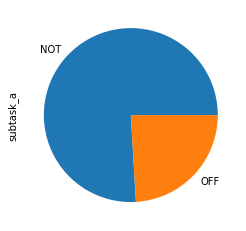

In [39]:
df2.plot.pie()

### No. of  Targeted Threat vs Untargeted vs Targeted Insult Offensive Tweets

In [40]:
df2 = test_df['subtask_b'].value_counts()
df2

UNT    39
TIN    34
TTH     4
Name: subtask_b, dtype: int64

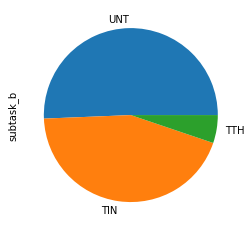

In [41]:
df2.plot.pie()

In [42]:
df2 = test_df['subtask_c'].value_counts()
df2

IND    30
GRP     4
ORG     3
OTH     2
Name: subtask_c, dtype: int64

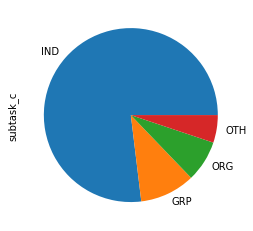

In [43]:
df2.plot.pie()

In [46]:
df2 = test_df.loc[test_df.subtask_a == 'NOT', 'subtask_b'].count()
df2

0

In [47]:
test_df.loc[test_df.subtask_a == 'OFF', 'subtask_b'].count()

77

In [48]:
df2 = test_df.loc[test_df.subtask_a == 'OFF', 'subtask_c'].count()

In [49]:
subtaskb_c_df = test_df.loc[test_df.subtask_a == 'OFF', ('subtask_b','subtask_c')]

### If Tweet is Offensive and untargeted then no. of subtask_c type tweets:

In [50]:
#Since it is Nan hence we do fillna() it
subtaskb_c_df["subtask_c"].fillna("None", inplace = True) 
subtaskb_c_df.loc[subtaskb_c_df.subtask_b=='UNT','subtask_c'].value_counts()

None    38
IND      1
Name: subtask_c, dtype: int64

### Average Length of Tweets in the Whole Dataset

In [52]:
totalWords = 0
maxWordCount = 0
minWordCount = 22
for tw in test_df['tweet']:
    #Strip Spaces
    tw = tw.strip()
    #Strip Special Characters
    t = re.sub(r'[^a-zA-Z0-9 ]',r'',tw)
#     print(t)
    wordCount = 0
    for char in t:
        if char == ' ':
            wordCount += 1
#     print(wordCount)
    if wordCount > maxWordCount:
        maxWordCount = wordCount
    if wordCount < minWordCount:
        minWordCount = wordCount
    totalWords += wordCount

avgLen = totalWords/len(test_df['tweet'])
print('Average Tweet Length: ' + str(avgLen))
print('Maximum Tweet Length: ' + str(maxWordCount))
print('Minimum Tweet Length: ' + str(minWordCount))
#     wordCount = len(split(t))
#     print(wordCount)
#     print(len(t))


Average Tweet Length: 19.140625
Maximum Tweet Length: 54
Minimum Tweet Length: 1
